# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [95]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [96]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [97]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [98]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)

In [99]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)


In [100]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])

        btc_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sent_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_sent_df = btc_sent_df[cols]

btc_sent_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...


In [101]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])

        eth_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sent_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_sent_df = eth_sent_df[cols]

eth_sent_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [102]:
# Describe the Bitcoin Sentiment
btc_sent_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.194484,0.003947,0.945316,0.050737
std,0.266427,0.017206,0.077066,0.069277
min,0.000000,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.897500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.075000,1.000000,0.174000


In [103]:
# Describe the Ethereum Sentiment
eth_sent_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.102920,0.025750,0.916550,0.057700
std,0.299156,0.054482,0.104965,0.076181
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.878000,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.226300,0.011750,1.000000,0.087250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean at 0.060950

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score at 0.877900

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score at 0.318000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [104]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [147]:
# Expand the default stopwords list if necessary
sw_addons = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'of', 'the', ' ', '']

In [148]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + sw_addons)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    output = [word for word in text if word not in sw]
    
    return text


In [149]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_sent_df.Text]
btc_sent_df['Tokens'] = btc_tokens
btc_sent_df.head()


,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, ha, partnered, with, cryptocurrency, st..."
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[in, november, , , after, an, absolutely, mass..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, , conventional, , cryptocurrencies, ,..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[if, youve, been, watching, the, crypto, marke..."
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...,"[six, year, after, the, launch, of, the, mexic..."


In [138]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_sent_df.Text]
eth_sent_df['Tokens'] = eth_tokens
eth_sent_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, , representation, of, the, ether..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, , representation, of, the, ether..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, , reuters, , , digital, currency, eth..."
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, , reuters, , , institutional, inve..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, , reuters, , , institutional, inve..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
from collections import Counter
from nltk import ngrams

In [139]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_sent_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('visa', 'ha'): 1,
 ('ha', 'partnered'): 1,
 ('partnered', 'with'): 1,
 ('with', 'cryptocurrency'): 1,
 ('cryptocurrency', 'startup'): 1,
 ('startup', 'blockfi'): 1,
 ('blockfi', 'to'): 1,
 ('to', 'offer'): 1,
 ('offer', 'the'): 1,
 ('the', 'first'): 1}

In [140]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_sent_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('', ''): 7,
 ('file', 'photo'): 1,
 ('photo', ''): 1,
 ('', 'representation'): 1,
 ('representation', 'of'): 1,
 ('of', 'the'): 1,
 ('the', 'ethereum'): 1,
 ('ethereum', 'virtual'): 1,
 ('virtual', 'currency'): 1,
 ('currency', 'standing'): 1}

In [141]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [152]:
# Get the top 10 words for Bitcoin
all_words_bitcoin = []
for tokens in btc_sent_df.Tokens:
    all_words_bitcoin += tokens
token_count(all_words_bitcoin, 10)

[('', 186),
 ('the', 26),
 ('char', 19),
 ('of', 16),
 ('bitcoin', 15),
 ('in', 14),
 ('a', 12),
 ('on', 11),
 ('reuters', 11),
 ('this', 10)]

In [154]:
# Get the top 10 words for Ethereum
all_words_ethereum = []
for tokens in eth_sent_df.Tokens:
    all_words_ethereum += tokens
token_count(all_words_ethereum, 10)

[('', 189),
 ('the', 21),
 ('a', 21),
 ('char', 20),
 ('of', 17),
 ('reuters', 17),
 ('in', 15),
 ('bitcoin', 14),
 ('to', 13),
 ('is', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

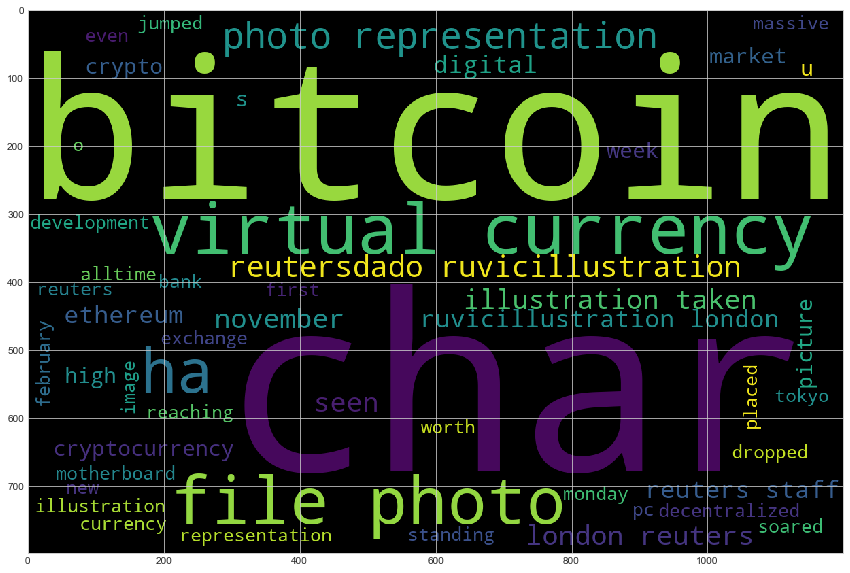

In [156]:
# Generate the Bitcoin word cloud
all_words_bitcoin_str = ' '.join(all_words_bitcoin)
wc = WordCloud(width=1200, height=800, max_words=50).generate(all_words_bitcoin_str)
plt.imshow(wc)

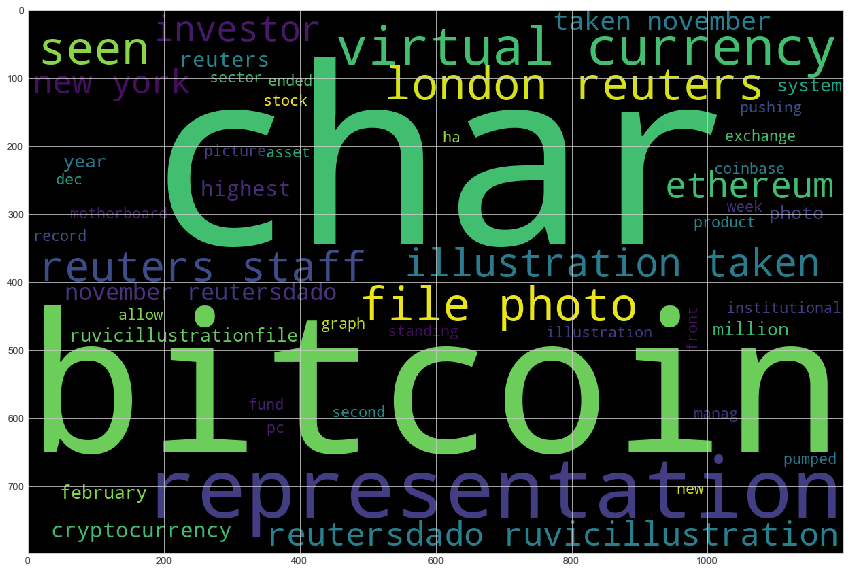

In [157]:
# Generate the Ethereum word cloud
all_words_ethereum_str = ' '.join(all_words_ethereum)
wc = WordCloud(width=1200, height=800, max_words=50).generate(all_words_ethereum_str)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!